# Progetto di Valerio Maglianella - Classificatore

## Data loading

In [ ]:
# importo librerie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# carico il dataset da url
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)

In [ ]:
# # carico dataset montando drive
# from google.colab import drive
# drive.mount("/content/drive")
# # carico il dataset
# path = "/content/drive/MyDrive/Progetto_Base_ASAI/parkinsons.data"
# df = pd.read_csv(path)

In [ ]:
# # ## valuta modi alternativi per caricare il dataset ad es. prendendolo da internet 
# # #!pip install --upgrade --no-cache-dir gdown -q
# !gdown --id 1ijol3LrADd_TMcsooCKpM4YQvbWQ8RhL
# df = pd.read_csv("parkinsons.data")

**Source**:

(https://archive.ics.uci.edu/ml/datasets/parkinsons)

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.


**Data Set Information**:

This dataset is composed of a range of biomedical voice measurements from 31 people (ACTUALLY 32!!), 23 (ACTUALLY 24!!) with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).


**Attribute Information**:

Matrix column entries (attributes):
* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


## Data exploration

In [ ]:
# ispeziono primi 10 elementi del dataset
df.head(10)
# 24 colonne di cui una per 'name' e una per 'status' --> 22 features (o attributi?)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
# ispeziono le caratteristiche di ogni colonna del dataset
df.info()
# 195 valori per ogni colonna. NON CI SONO DATI MANCANTI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()
# nota che le feature presentano scale diverse --> usare scaler (eccetto per albero decisionale: feature scaling not required)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# CHECK PRELIMINARE: verifico il numero di soggetti e di osservazioni per soggetto per verificare che il dataset sia bilanciato
# for i, e in df.iterrows():
#   print(e['name'])
#inizializzo una lista in cui vado a inserire il numero di soggetto iterando sulle righe della colonna "name"
id_list = []
for index, row in df.iterrows():
  # trova numero identificativo del soggetto
  name = row['name']
  sogg = int(name[-4:-2])
  id_list.append(sogg)

print("Lista soggetti con ripetizioni:\n", id_list)

Lista soggetti con ripetizioni:
 [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 10, 10, 10, 10, 10, 10, 13, 13, 13, 13, 13, 13, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 37, 37, 37, 37, 37, 37, 39, 39, 39, 39, 39, 39, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50]


In [ ]:
# numero osservazioni per soggetto
diz = {}
for id in id_list:
  if id not in diz:
    diz[id] = 1
  else:
    diz[id] += 1
print("Numero osservazioni per soggetto:\n", diz)

print("\nSoggetti con numero di osservazioni diverso da 6:")
for k in diz.keys():
  if diz[k] != 6:
    print(k, diz[k])
# ci sono 6 osservazioni per soggetto, tranne per 3 soggetti (21, 27, 35) che ne hanno 7

Numero osservazioni per soggetto:
 {1: 6, 2: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 10: 6, 13: 6, 16: 6, 17: 6, 18: 6, 19: 6, 20: 6, 21: 7, 22: 6, 24: 6, 25: 6, 26: 6, 27: 7, 31: 6, 32: 6, 33: 6, 34: 6, 35: 7, 37: 6, 39: 6, 42: 6, 43: 6, 44: 6, 49: 6, 50: 6}

Soggetti con numero di osservazioni diverso da 6:
21 7
27 7
35 7


In [ ]:
# numero soggetti univoci
soggetti = list(set(id_list))
print("lista soggetti senza ripetizioni:\n", soggetti)
print("numero soggetti:\n", len(soggetti))

lista soggetti senza ripetizioni:
 [1, 2, 4, 5, 6, 7, 8, 10, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 31, 32, 33, 34, 35, 37, 39, 42, 43, 44, 49, 50]
numero soggetti:
 32


## Data visualization

Riassumendo, abbiamo 32 soggetti, per ognuno ci sono 6 osservazioni (tranne che per 3 che ne hanno 7), di conseguenza il dataset risulta bilanciato riguardo all'importanza di ogni soggetto. Adesso, dobbiamo verificare se il dataset risulta bilanciato riguardo allo status (0=healthy, 1=Parkinson) ed esaminare la distribuzione delle features.

In [ ]:
#suddivido dataset in x (features) e y (labels)
x = df.drop(columns=['name','status'])
y = pd.DataFrame(df['status'])

In [ ]:
# calcolo quanti soggetti sono sani e quanti Parkinson
d2 = {}
for index, row in y.iterrows():
  if id_list[index] not in d2:
    d2[id_list[index]] = row['status']
  else:
    continue

print(d2)

{1: 1, 2: 1, 4: 1, 5: 1, 6: 1, 7: 0, 8: 1, 10: 0, 13: 0, 16: 1, 17: 0, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 24: 1, 25: 1, 26: 1, 27: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 37: 1, 39: 1, 42: 0, 43: 0, 44: 1, 49: 0, 50: 0}


In [ ]:
v = list(d2.values())
print(f'Ci sono {v.count(0)} soggetti sani e {v.count(1)} soggetti Parkinson')

Ci sono 8 soggetti sani e 24 soggetti Parkinson


In [ ]:
# #plotto labels = variabili dipendenti (0 = individuo sano, 1 = affetto da PD)
# y.hist(bins=3)
# plt.show()

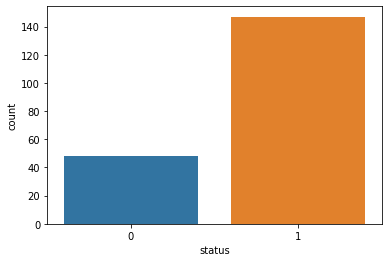

In [ ]:
# plotto labels = variabili dipendenti (0 = individuo sano, 1 = affetto da PD) usando seaborn 
sns.countplot(x ='status', data = y)
plt.show()

In [ ]:
y.value_counts()
# il dataset risulta sbilanciato con 147 casi (NON SOGGETTI!) PD e 48 sani.
#Cosa possiamo fare? oversample/downsample? oversample sarebbe meglio visto che non abbiamo molti dati (es. SMOTE)
#Sarà necessario stratificare lo splitting dei dati

status
1         147
0          48
dtype: int64

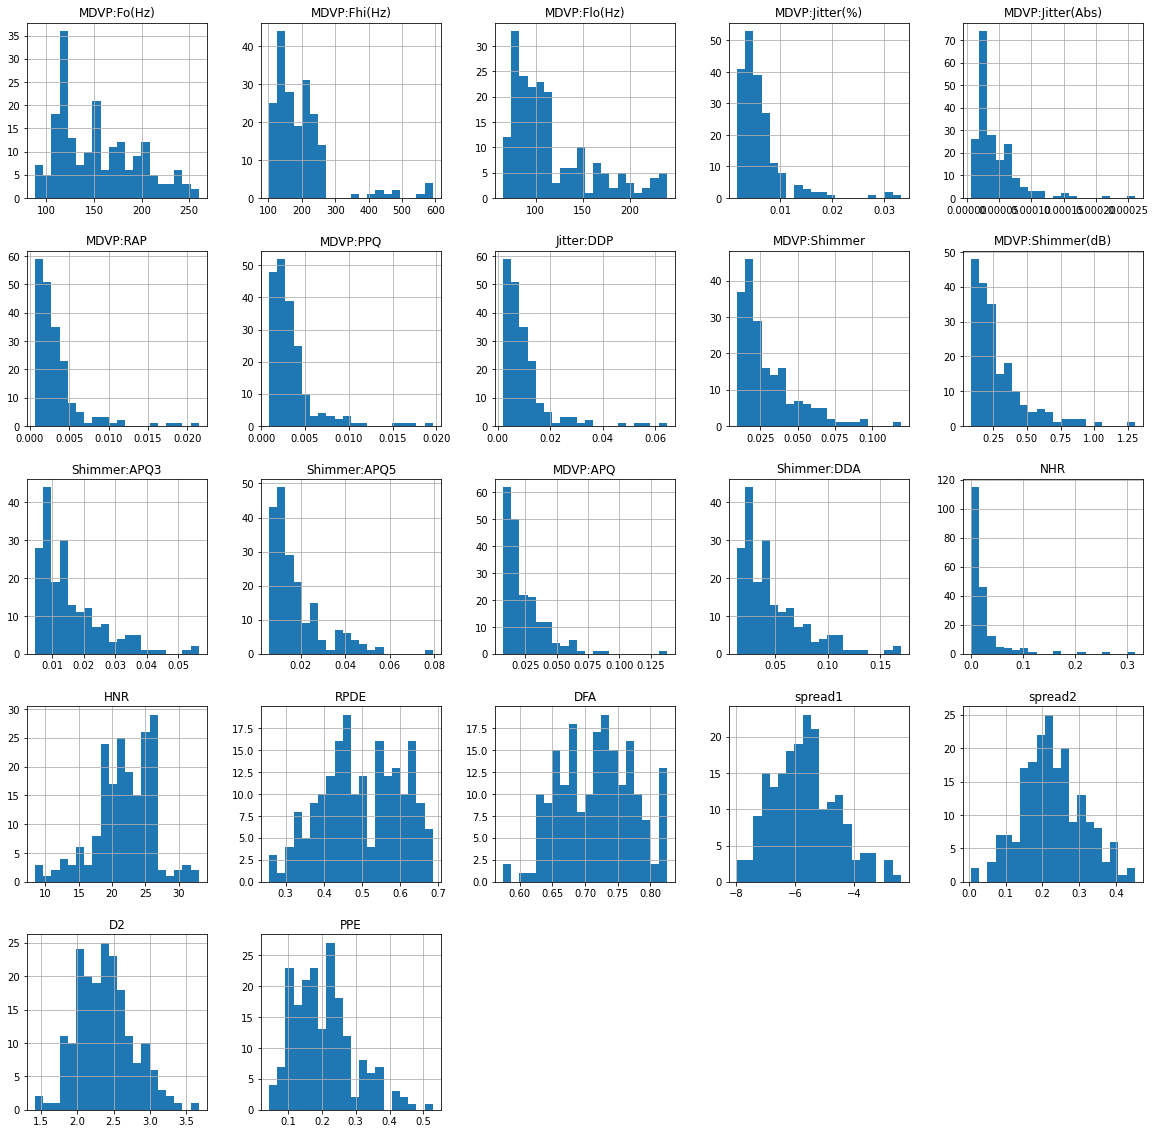

In [ ]:
# plotto features = variabili indipendenti
x.hist(bins=20, figsize=(20,20))
plt.show()
# many feautures show a positively skewed distribution, it means that they have a higher number of data points having low values.
# Ciò cosa comporta? Cosa possiamo fare? si potrebbe applicare una log transformation
# OPPURE --> There are models that do not make assumption that the underlying data distribution is a normal distribution.
# For example, support vector machine just cares about the boundaries of the separating hyperplane and do not assume the exact 
# shape of the distributions. Decision tree models also do not make such assumption.

In [ ]:
# visualizzo la distribuzione dei dati e le correlazioni
sns.pairplot(x, diag_kind = 'kde')
# da uno sguardo d'insieme si notano varie correlazioni tra le features --> potremmo toglierne alcune in FEATURE SELECTION
# You can deal with multicollinearity by 1. dropping highly correlated variables; 2. extracting new features with Principal Component Analysis (PCA)

Output hidden; open in https://colab.research.google.com to view.

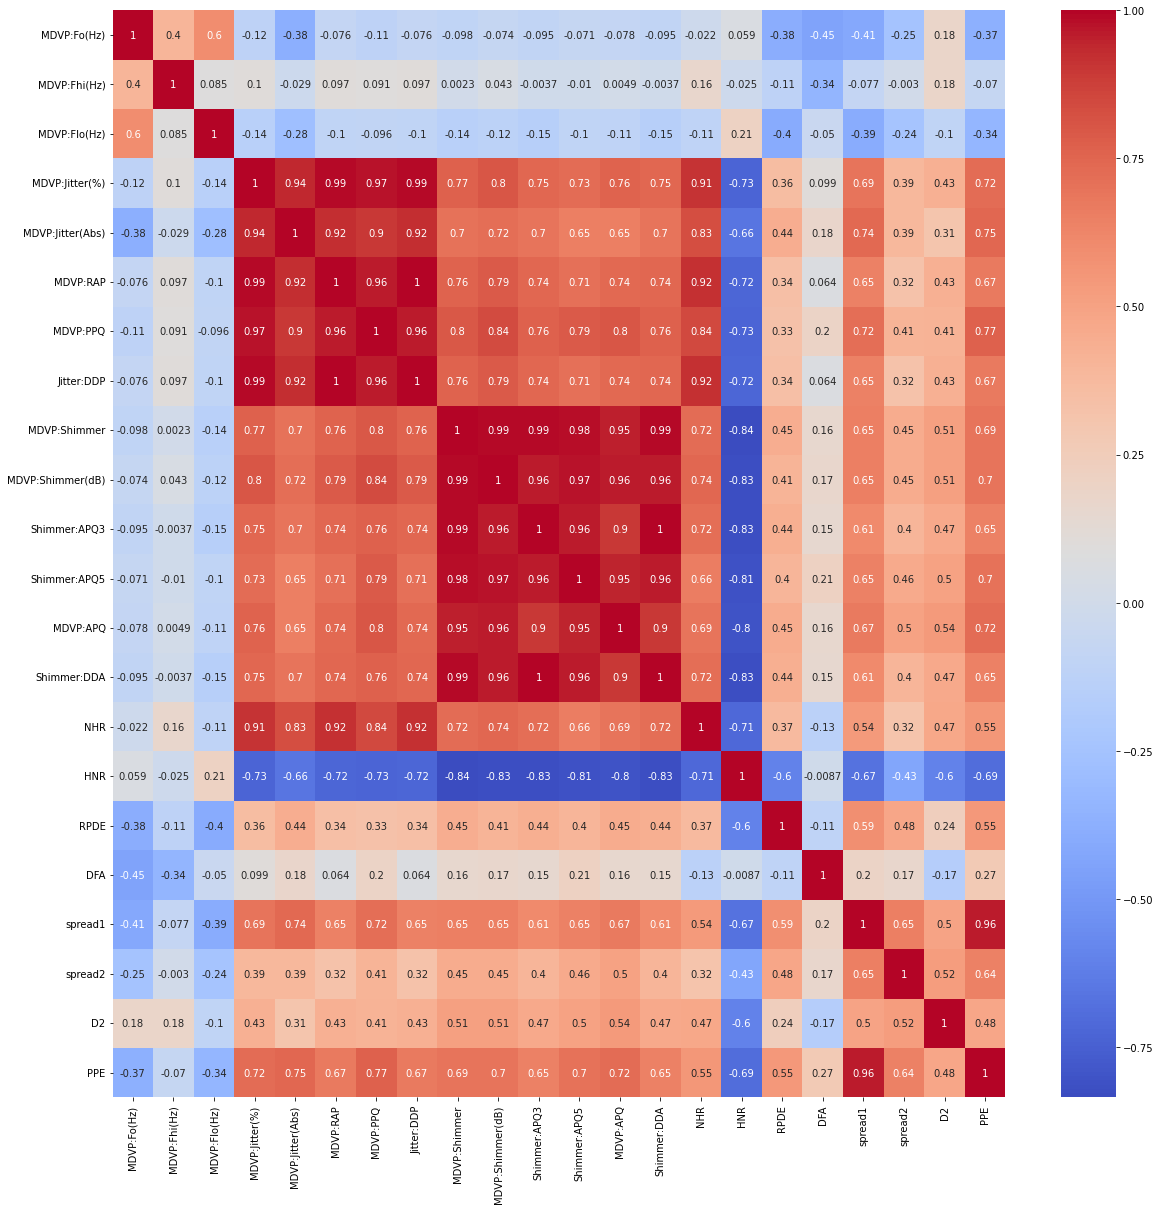

In [ ]:
# esamino più nel dettaglio i coefficienti di correlazione tra le features
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(x.corr(),annot=True,ax=ax, cmap='coolwarm')
plt.show()

<Figure size 432x432 with 0 Axes>

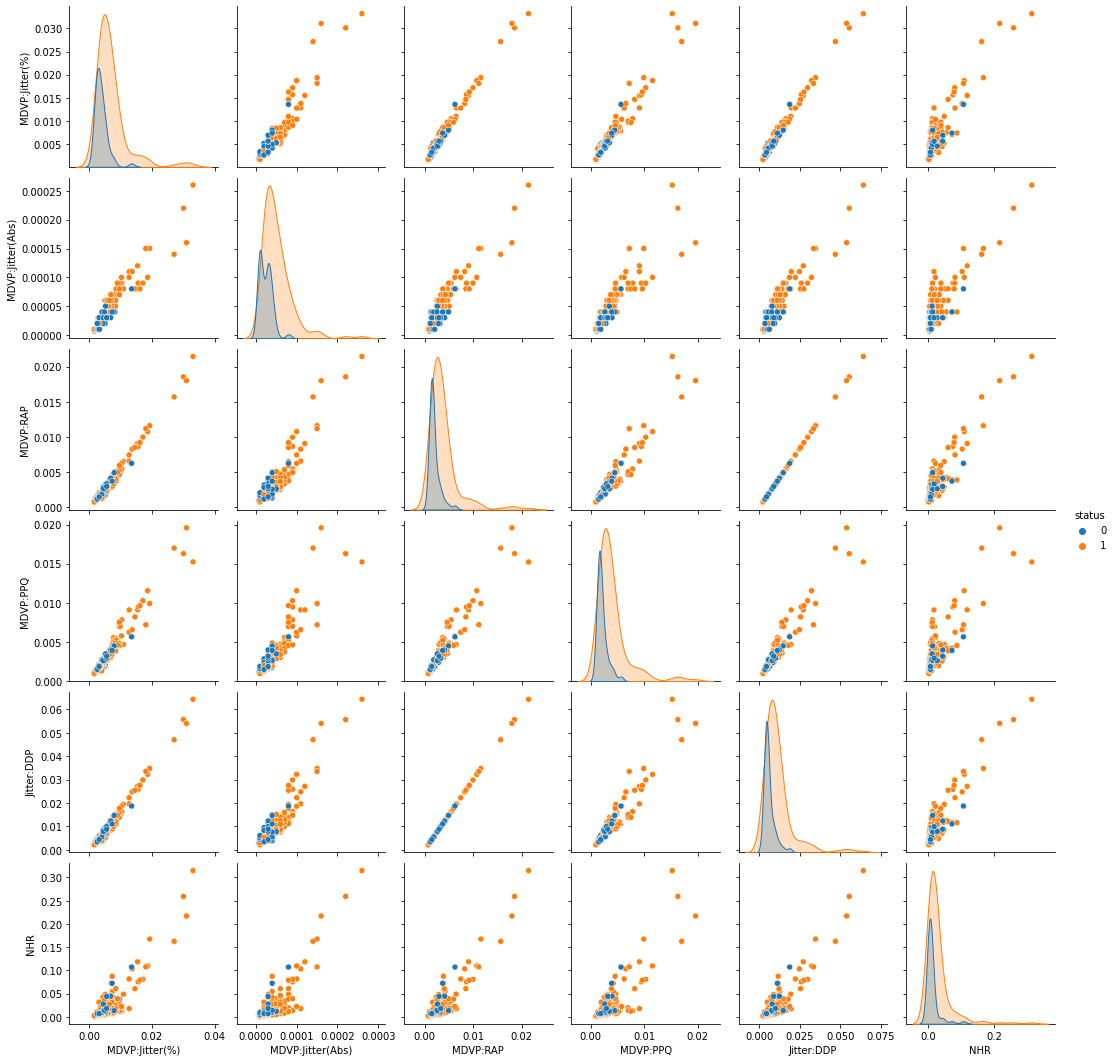

In [ ]:
# Visualizzo i grafici accoppiati (pairplot) delle feature con alta correlazione lineare (> ~0.9).
plt.figure(figsize=(6,6))
sns.pairplot(df, hue='status', vars = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'NHR'])
plt.show()

In [ ]:
# plt.figure(figsize=(6,6))
# sns.pairplot(df, hue='status', vars = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA'])
# plt.show()

In [ ]:
# plt.figure(figsize=(2,2))
# sns.pairplot(df, hue='status', vars = ['spread1', 'PPE'])
# plt.show()

In [ ]:
# # elimino alcune feature che correlano molto
# x = x.drop(columns=['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'PPE']) 

In [ ]:
# # test: applicare log transformation a una feature con skewness positiva per verificare se la distribuzione diventa più normale: Sì!
# # tuttavia resta da valutare se necessario in base al modello e se abbiamo miglioramento delle prestazioni
# test = pd.DataFrame(x['MDVP:Shimmer'])
# print(test.head())
# # import numpy as np
# test = np.log(test)
# print(test.head())
# test.hist(bins=20)
# plt.show()

## Data Preparation

Abbiamo già verificato che non ci sono dati mancanti/insensati da sostituire. Possiamo dunque procedere con la normalizzazione dei dati.

In [ ]:
# ulteriore check valori nulli: nessuno!
x.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# # # applico standard scaler
# from sklearn.preprocessing import StandardScaler
# # build the scaler model
# scaler = StandardScaler()
# # fit using the train set
# scaler.fit(x)
# # transform the test test
# x = scaler.transform(x)
# x = pd.DataFrame(x, columns=df.drop(columns=['name','status']).columns)
# x.head()

In [ ]:
# # !!normalizzazione è meglio con distribuzione non gaussiana. standardizz richiede distribuz normale
# from sklearn.preprocessing import MinMaxScaler
# # build the scaler model
# scaler = MinMaxScaler()
# # fit using the train set
# scaler.fit(x)
# # transform the test test
# x = scaler.transform(x)
# x = pd.DataFrame(x, columns=df.drop(columns=['name','status']).columns)
# x.head()

## Train-test split & Feature scaling

In [ ]:
if isinstance(y, pd.DataFrame): # metto questo check perchè altrimenti se runno più volte dà errore
  y = y['status'] # labels in formato array --> senza questa trasformazione, gridsearch dà ravel warning:
                  # "A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using  ravel()."

#divido dati in training e test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify = y)

x_train_pre = x_train
x_test_pre = x_test

x_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
13,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
37,176.170,185.604,163.564,0.00369,0.00002,0.00205,0.00218,0.00616,0.01851,0.168,...,0.01491,0.02814,0.00340,24.951,0.341435,0.783626,-6.006414,0.196371,2.536527,0.173218
150,186.695,211.961,149.442,0.01872,0.00010,0.01075,0.01154,0.03225,0.05830,0.784,...,0.06259,0.08096,0.10952,12.529,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487
58,116.879,131.897,108.153,0.00788,0.00007,0.00334,0.00493,0.01003,0.02645,0.265,...,0.02137,0.04183,0.00786,22.603,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
101,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.05174,0.09669,0.11843,15.060,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881


In [ ]:
# applico scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#@markdown Set the decired scaler and model:
used_scaler = 'minmax' #@param ["minmax", "standard", "robust"]

# build the scaler model
if used_scaler == 'standard':
  scaler = StandardScaler()
elif used_scaler == 'minmax':
  scaler = MinMaxScaler()
elif used_scaler == 'robust':
  scaler = RobustScaler()

# fit and transform using the train set
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=x.columns)

# build the scaler model
if used_scaler == 'standard':
  scaler = StandardScaler()
elif used_scaler == 'minmax':
  scaler = MinMaxScaler()
elif used_scaler == 'robust':
  scaler = RobustScaler()

# fit and transform using the test set
x_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns)

x_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.364424,0.100388,0.414689,0.066709,0.090909,0.061896,0.070506,0.061734,0.039934,0.034625,...,0.038491,0.049498,0.012920,0.654416,0.319919,0.825908,0.386717,0.415919,0.824682,0.287638
1,0.173743,0.228445,0.201221,0.111076,0.169960,0.088975,0.132400,0.088814,0.071606,0.061006,...,0.076368,0.065847,0.033305,0.585806,0.949444,0.332821,0.482595,0.320883,0.281981,0.414670
2,0.231602,0.055149,0.280930,0.084583,0.130435,0.026596,0.037137,0.026435,0.093455,0.079143,...,0.065458,0.130214,0.010814,0.712249,0.578533,0.753106,0.203706,0.558246,0.515209,0.102996
3,0.689310,0.213913,0.779101,0.004788,0.011858,0.014023,0.008073,0.013701,0.016433,0.014839,...,0.014982,0.022657,0.000000,1.000000,0.191218,0.681778,0.000000,0.218942,0.526600,0.000000
4,0.387651,0.115681,0.487881,0.075327,0.090909,0.071567,0.068353,0.071406,0.637474,0.563067,...,0.378611,0.763131,0.048585,0.481860,0.563190,0.566929,0.255666,0.321964,0.450075,0.162871


## SVM

In [ ]:
#importo, definisco e alleno SVM
from sklearn.svm import SVC
my_svm = SVC(C=100, degree=1, gamma='scale', kernel='rbf')
my_svm.fit(x_train, y_train)
#predico dati di test
pred = my_svm.predict(x_test)
#valuto prestazioni
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print('\nConfusion matrix:')
print(confusion_matrix(y_test,pred))
print('\nClassification report:')
print(classification_report(y_test,pred))

Accuracy: 0.9661016949152542

Confusion matrix:
[[14  1]
 [ 1 43]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.98      0.98      0.98        44

    accuracy                           0.97        59
   macro avg       0.96      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59



In [ ]:
# Remember that sklearn's convention is to put predictions to COLUMNS, and true labels to ROWS. Like this:
# TN    FP
# FN    TP
# And NOT like this:
# TP    FN
# FP    TN

In [ ]:
# # faccio stratified crossvalidation con grid search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

SVM_scoring = ['accuracy', 'precision','recall', 'f1']
SVM_parameters = {
              "C": [0.5, 1.0, 10, 100, 1000],  # regularization parameter (must be strictly positive) It tells us how much misclassification we want to avoid (higher c –-> Hard margin & risk of overfitting; lower C –-> Soft margin)
              "kernel":["linear","rbf", "poly", "sigmoid"], # take data as input and transform it into the required form to better solve the classification task  
              "degree":[1, 2, 3, 4, 5],  # degree of the polynomial kernel function - ignored by other kernels
              "gamma":['scale', 'auto'],  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ Decreasing the Gamma will result that finding the correct hyperplane will consider points at greater distances so more and more points will be used --> less overfitting
              }

SVM = GridSearchCV(
                  SVC(random_state = 1), # stimatore (algoritmo di classificazione)
                  SVM_parameters, # griglia dei parametri
                  scoring = SVM_scoring, # parametri per la valutazione del modello
                  refit = "f1", # refit an estimator using the best found parameters (using the scorer f1) on the whole dataset -- consider using recall instead...
                  cv = 5, # stratified 5-fold CV
                  n_jobs=-1 # number of jobs to run in parallel; -1 uses all processors
                  ) 

In [ ]:
# ci mette meno di 30s
SVM.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
print("SVM best parameters:\n", SVM.best_params_)
print("SVM train f1:\n", SVM.score(x_train, y_train)) # Return the score on the given data, if the estimator has been refit.
print("SVM validation best f1 score:\n", SVM.best_score_) # mean cross-validated score of the best_estimator

SVM best parameters:
 {'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM train f1:
 1.0
SVM validation best f1 score:
 0.9363182346109176


In [ ]:
y_pred_SVM_train = SVM.best_estimator_.predict(x_train)

print("SVM train f1:\n", SVM.score(x_train, y_train))
print("\nSVM train, confusion matrix:\n", confusion_matrix(y_train, y_pred_SVM_train))
print("\nSVM train, classification report:\n", classification_report(y_train, y_pred_SVM_train))

SVM train f1:
 1.0

SVM train, confusion matrix:
 [[ 33   0]
 [  0 103]]

SVM train, classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       103

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



In [ ]:
y_pred_SVM = SVM.best_estimator_.predict(x_test)

print("SVM test f1:\n", SVM.score(x_test, y_test))
print("\nSVM test, confusion matrix:\n", confusion_matrix(y_test, y_pred_SVM))
print("\nSVM test, classification report:\n", classification_report(y_test, y_pred_SVM))

SVM test f1:
 0.9772727272727273

SVM test, confusion matrix:
 [[14  1]
 [ 1 43]]

SVM test, classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.98      0.98      0.98        44

    accuracy                           0.97        59
   macro avg       0.96      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59



## Tree

In [ ]:
x_train = x_train_pre
x_test = x_test_pre

In [ ]:
#importo, definisco e alleno albero
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=8, max_features='sqrt')
tree.fit(x_train, y_train)
#predico dati di test
pred = tree.predict(x_test)
#valuto prestazioni
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print('\nConfusion matrix:')
print(confusion_matrix(y_test,pred))
print('\nClassification report:')
print(classification_report(y_test,pred))

Accuracy: 0.864406779661017

Confusion matrix:
[[10  5]
 [ 3 41]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.89      0.93      0.91        44

    accuracy                           0.86        59
   macro avg       0.83      0.80      0.81        59
weighted avg       0.86      0.86      0.86        59



In [ ]:
# # faccio stratified crossvalidation con grid search
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tree_scoring = ['accuracy', 'precision','recall', 'f1']
tree_parameters = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion':['gini', 'entropy'],
}

tree = GridSearchCV(
                  tree.DecisionTreeClassifier(random_state = 1), # stimatore (algoritmo di classificazione)
                  tree_parameters, # griglia dei parametri
                  scoring = tree_scoring, # parametri per la valutazione del modello
                  refit = "f1", # refit an estimator using the best found parameters (using the scorer f1) on the whole dataset -- consider using recall instead...
                  cv = 5, # stratified 5-fold CV
                  n_jobs=-1 # number of jobs to run in parallel; -1 uses all processors
                  ) 

In [ ]:
# ci mette meno di 2.5s
tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2']},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
print("tree best parameters:\n", tree.best_params_)
print("tree train f1:\n", tree.score(x_train, y_train))
print("tree validation best f1 score:\n", tree.best_score_) # mean cross-validated score of the best_estimator

tree best parameters:
 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}
tree train f1:
 1.0
tree validation best f1 score:
 0.8719023523901572


In [ ]:
y_pred_tree = tree.best_estimator_.predict(x_test)

print("tree test f1:\n", tree.score(x_test, y_test))
print("\ntree test, confusion matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\ntree test, classification report:\n", classification_report(y_test, y_pred_tree))

tree test f1:
 0.9347826086956522

tree test, confusion matrix:
 [[10  5]
 [ 1 43]]

tree test, classification report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59



## Random Forest

In [ ]:
# # faccio stratified crossvalidation con grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

forest_scoring = ['accuracy', 'precision','recall', 'f1']
forest_parameters = {
    'n_estimators': [200,300,400,500], # The number of trees in the forest
    'max_features': ['sqrt', 'log2'], # The number of features to consider when looking for the best split
    'max_depth': [4,5,6,7,8], # The maximum depth of the tree
    'criterion':['gini', 'entropy'], # The function to measure the quality of a split
}

forest = GridSearchCV(
                  RandomForestClassifier(random_state = 1), # stimatore (algoritmo di classificazione)
                  forest_parameters, # griglia dei parametri
                  scoring = forest_scoring, # parametri per la valutazione del modello
                  refit = "f1", # refit an estimator using the best found parameters (using the scorer f1) on the whole dataset -- consider using recall instead...
                  cv = 5, # stratified 5-fold CV
                  n_jobs=-1 # number of jobs to run in parallel; -1 uses all processors
                  ) 

In [ ]:
# ci mette meno di 4 min
forest.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
print("forest best parameters:\n", forest.best_params_)
print("forest train f1:\n", forest.score(x_train, y_train))
print("forest validation best f1 score:\n", forest.best_score_) # mean cross-validated score of the best_estimator

forest best parameters:
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}
forest train f1:
 1.0
forest validation best f1 score:
 0.9215644820295983


In [ ]:
y_pred_forest = forest.best_estimator_.predict(x_test)

print("forest test f1:\n", forest.score(x_test, y_test))
print("\nforest test, confusion matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("\nforest test, classification report:\n", classification_report(y_test, y_pred_forest))

forest test f1:
 0.9662921348314608

forest test, confusion matrix:
 [[13  2]
 [ 1 43]]

forest test, classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.96      0.98      0.97        44

    accuracy                           0.95        59
   macro avg       0.94      0.92      0.93        59
weighted avg       0.95      0.95      0.95        59



In [ ]:
# forest_importances = pd.Series(forest.feature_importances_,
#                                index=x.columns[:]) 

# forest_importances.sort_values(ascending=False).plot.bar() 
# forest_importances.sort_values(ascending=False)

## Multi-Layer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier  # implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation
MLP_scoring = ['accuracy', 'precision','recall', 'f1']
MLP_parameters = {
                  "hidden_layer_sizes": [(100,), (100,100,), (100,100,100,)],   # Number of neurons in the hidden layers
                  "activation": ['relu', 'logistic', 'tanh'],  # Activation function for the hidden layer
                  "solver": ['adam', 'lbfgs', 'sgd'],  # Solver for weight optimization | ADAM:large datasets; lbfgs:small datasets
                  "learning_rate": ['constant', 'invscaling', 'adaptive'],
                  "learning_rate_init": [0.001, 0.01, 0.1],
                  "max_iter": [200, 1000, 2000],
                  "random_state": [1],
                }

# passing the scoring function in the GridSearchCV
MLP = GridSearchCV(
                  MLPClassifier(), # estimator
                  MLP_parameters, # parameters_grid
                  scoring = MLP_scoring, 
                  refit = "f1", # refit an estimator using the best found parameters (using the scorer f1) on the whole dataset -- consider using recall instead...
                  cv = 5, # stratified 5-fold CV
                  n_jobs = -1 # number of jobs to run in parallel; -1 uses all processors
                  ) 

In [ ]:
# ci mette circa 20 min
MLP.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(100,), (100, 100),
                                                (100, 100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [200, 1000, 2000], 'random_state': [1],
                         'solver': ['adam', 'lbfgs', 'sgd']},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
print("MLP best parameters:\n", MLP.best_params_)
print("MLP validation F1:\n", MLP.score(x_train, y_train)) #return the mean accuracy on the given test data and labels
print("MLP validation best f1 score:\n", MLP.best_score_)

MLP best parameters:
 {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'random_state': 1, 'solver': 'lbfgs'}
MLP validation accuracy:
 1.0
MLP validation best f1 score:
 0.9474866974583367


In [ ]:
y_pred_MLP = MLP.best_estimator_.predict(x_test)
print("MLP test F1:\n", MLP.score(x_test, y_test))
print("MLP test, confusion matrix:\n", confusion_matrix(y_test, y_pred_MLP))
print("MLP test, classification report:\n", classification_report(y_test, y_pred_MLP))

MLP test accuracy:
 0.9662921348314608
MLP test, confusion matrix:
 [[13  2]
 [ 1 43]]
MLP test, classification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.96      0.98      0.97        44

    accuracy                           0.95        59
   macro avg       0.94      0.92      0.93        59
weighted avg       0.95      0.95      0.95        59



## DNN (MLP)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint

tf.random.set_seed(1)

def create_model():
    model = Sequential()

    # model.add(Dense(256, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(Dense(128, activation='relu'))
    # model.add(Dropout(0.3))
    model.add(Flatten(input_shape=(22, 1)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))   
    model.add(Dense(2, activation = 'softmax'))

    return model

model = create_model()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# ci mette circa 2 minuti
model_checkpoint_callback = ModelCheckpoint(filepath='model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, callbacks=[model_checkpoint_callback])

Epoch 1/500
5/5 [==============================] - 1s 95ms/step - loss: 0.5164 - accuracy: 0.7574 - val_loss: 0.5183 - val_accuracy: 0.7458
Epoch 2/500
5/5 [==============================] - 0s 26ms/step - loss: 0.4955 - accuracy: 0.7574 - val_loss: 0.4946 - val_accuracy: 0.7458
Epoch 3/500
5/5 [==============================] - 0s 14ms/step - loss: 0.4708 - accuracy: 0.7574 - val_loss: 0.4794 - val_accuracy: 0.7458
Epoch 4/500
5/5 [==============================] - 0s 13ms/step - loss: 0.4675 - accuracy: 0.7574 - val_loss: 0.4687 - val_accuracy: 0.7458
Epoch 5/500
5/5 [==============================] - 0s 17ms/step - loss: 0.4502 - accuracy: 0.7574 - val_loss: 0.4566 - val_accuracy: 0.7458
Epoch 6/500
5/5 [==============================] - 0s 16ms/step - loss: 0.4520 - accuracy: 0.7574 - val_loss: 0.4461 - val_accuracy: 0.7458
Epoch 7/500
5/5 [==============================] - 0s 19ms/step - loss: 0.4478 - accuracy: 0.7574 - val_loss: 0.4379 - val_accuracy: 0.7458
Epoch 8/500
5/5 [===

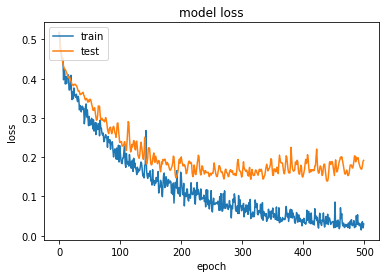

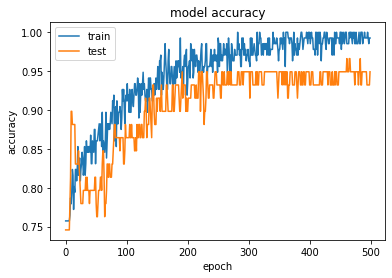

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = tf.keras.models.load_model('model.h5')
y_pred = np.argmax(model.predict(x_test), axis=1)

confusion_matrix(y_test, y_pred)

2/2 [==============================] - 0s 7ms/step


array([[15,  0],
       [ 2, 42]])

In [ ]:
print("\nDNN test, classification report:\n", classification_report(y_test, y_pred))


DNN test, classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.95      0.98        44

    accuracy                           0.97        59
   macro avg       0.94      0.98      0.96        59
weighted avg       0.97      0.97      0.97        59

